In [220]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (
    export_graphviz,
    DecisionTreeClassifier,
    )
    ## check


from sklearn.ensemble import(
    RandomForestClassifier, ## check
    VotingClassifier,
    GradientBoostingClassifier
    )
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix
    )     ##check
from sklearn.model_selection import (
    train_test_split,
    KFold ,
    StratifiedShuffleSplit,  ## check
    cross_val_score,     ##check
    RandomizedSearchCV
    )


In [221]:

 # 1. daily raw data 가져오기
df = pd.read_excel(r"C:\code\auto_raw8.xlsx", sheet_name="Sheet1", header=0, index_col=0)

In [222]:
df.head(5)

,auto,KOSPI지수,원/달러 환율,원/엔 환율,국채 3년물,국채 10년물,PER,PBR,VKOSPI,treasury_10_3_diff,...,PPI_60,USA_Vehi_Sell_60,구리 선물_60,중국 고정자산투자(yoy)_60,중국 PMI_60,금 선물_60,MSCI_EMER_60,달러 인덱스_60,중국소매판매_60,중국 산업 생산_60
base_date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,up,1692.85,1131.3,1213.45,3.895,4.94,24.35,1.36,13.47,1.06,...,0.000217,-0.001695,0.000646,-0.003116,-0.001932,-0.000143,0.000025,0.000891,0.006217,-0.008068
2010-04-01,up,1719.17,1126.4,1204.45,3.895,4.92,24.13,1.38,13.63,1.07,...,0.000212,-0.001737,0.000842,-0.003191,-0.001859,-0.000108,0.000181,0.000870,0.006153,-0.007687
2010-04-05,up,1724.99,1123.1,1188.97,3.840,4.95,24.22,1.38,13.56,1.11,...,0.000207,-0.001560,0.001063,-0.003258,-0.001785,-0.000062,0.000369,0.000855,0.006087,-0.007304
2010-04-06,up,1726.09,1123.2,1195.40,3.845,4.94,24.24,1.38,14.75,1.10,...,0.000200,-0.001339,0.001314,-0.003318,-0.001709,0.000015,0.000572,0.000841,0.006020,-0.006919
2010-04-07,up,1726.60,1120.5,1191.13,3.820,4.88,24.26,1.39,14.22,1.06,...,0.000193,-0.001121,0.001518,-0.003370,-0.001632,0.000112,0.000767,0.000835,0.005952,-0.006532


In [223]:
column_names = [
    'auto','KOSPI Index', 'Exchange Rate (KRW/USD)', 'Exchange Rate (KRW/JPY)',
    '3-Year Treasury Bond', '10-Year Treasury Bond', 'Price-to-Earnings Ratio', 
    'Price-to-Book Ratio', 'Volatility Index of KOSPI',
    '10-Year Treasury Bond Minus 3-Year Treasury Bond',
    '10-Year Treasury Yield Minus 2-Year Treasury Yield', 'USA Consumer Price Index', 
    'USA Employment Inflation', 'Yield Gap Percentage', 'Consumer Price Index', 
    'Export', 'West Texas Intermediate (WTI) Crude Oil Price', 
    '2-Year Treasury Constant Maturity Rate', '10-Year Treasury Constant Maturity Rate',
    'Treasury Inflation-Protected Securities (TIPS) Yield', 'Volatility Index (VIX)', 
    'Producer Price Index (PPI)', 'USA Vehicle Sales', 'Copper Futures',
    'China Fixed Asset Investment (Year-over-Year)', 
    'China Purchasing Managers\' Index (PMI)', 'Gold Futures', 
    'MSCI Emerging Markets Index', 'US Dollar Index', 'China Retail Sales',
    'China Industrial Production', 'KOSPI Index (20-day Moving Average)', 
    'Exchange Rate (KRW/USD) (20-day Moving Average)',
    'Exchange Rate (KRW/JPY) (20-day Moving Average)', 
    '3-Year Treasury Bond (20-day Moving Average)', 
    '10-Year Treasury Bond (20-day Moving Average)', 
    'Price-to-Earnings Ratio (20-day Moving Average)', 
    'Price-to-Book Ratio (20-day Moving Average)', 
    'Volatility Index of KOSPI (20-day Moving Average)',
    '10-Year Treasury Bond Minus 3-Year Treasury Bond (20-day Moving Average)', 
    '10-Year Treasury Yield Minus 2-Year Treasury Yield (20-day Moving Average)',
    'T10Y2Y_20', 'usa_cpi_20', 'us_e_infla_20', 'yield_gap(%)_20', 'cpi_20',
    'export_20', 'WTI_20', 'DGS2_20', 'DGS10_20', 'TIPS_20', 'VIX_20', 'PPI_20',
    'USA_Vehi_Sell_20', 'Copper Futures (20-day Moving Average)', 'China Fixed Asset Investment (Year-over-Year) (20-day Moving Average)',
    'China Purchasing Managers\' Index (PMI) (20-day Moving Average)', 'Gold Futures (20-day Moving Average)',
    'MSCI Emerging Markets Index (20-day Moving Average)', 'US Dollar Index (20-day Moving Average)',
    'China Retail Sales (20-day Moving Average)', 'China Industrial Production (20-day Moving Average)',
    'KOSPI Index (60-day Moving Average)', 'Exchange Rate (KRW/USD) (60-day Moving Average)',
    'Exchange Rate (KRW/JPY) (60-day Moving Average)', '3-Year Treasury Bond (60-day Moving Average)',
    '10-Year Treasury Bond (60-day Moving Average)', 'Price-to-Earnings Ratio (60-day Moving Average)',
    'Price-to-Book Ratio (60-day Moving Average)', 'VKOSPI (60-day Moving Average)',
    'Treasury 10-Year Minus 3-Year Differential (60-day Moving Average)',
    '10-Year Treasury Yield Minus 2-Year Treasury Yield (60-day Moving Average)',
    'USA Consumer Price Index (60-day Moving Average)', 'USA Employment Inflation (60-day Moving Average)',
    'Yield Gap Percentage (60-day Moving Average)', 'Consumer Price Index (60-day Moving Average)',
    'Export (60-day Moving Average)', 'West Texas Intermediate (WTI) Crude Oil Price (60-day Moving Average)',
    '2-Year Treasury Constant Maturity Rate (60-day Moving Average)',
    '10-Year Treasury Constant Maturity Rate (60-day Moving Average)',
    'Treasury Inflation-Protected Securities (TIPS) Yield (60-day Moving Average)',
    'Volatility Index (VIX) (60-day Moving Average)', 'Producer Price Index (PPI) (60-day Moving Average)',
    'USA Vehicle Sales (60-day Moving Average)', 'Copper Futures (60-day Moving Average)',
    'China Fixed Asset Investment (Year-over-Year) (60-day Moving Average)',
    'China Purchasing Managers\' Index (PMI) (60-day Moving Average)', 'Gold Futures (60-day Moving Average)',
    'MSCI Emerging Markets Index (60-day Moving Average)', 'US Dollar Index (60-day Moving Average)',
    'China Retail Sales (60-day Moving Average)', 'China Industrial Production (60-day Moving Average)'
]

def check_english_only_in_list(lst):
    for item in lst:
        if not item.isascii():
            return False
    return True

# 검사 실행
if check_english_only_in_list(column_names):
    print("주어진 목록에는 영어만 포함되어 있습니다.")
else:
    print("주어진 목록에는 영어 이외의 문자가 포함되어 있습니다.")

    
    

df.rename(columns=dict(zip(df.columns, column_names)), inplace=True)

print("facter type:\n %s " % df.columns)
print("갯수 : %i " %len(df.columns))

주어진 목록에는 영어만 포함되어 있습니다.
facter type:
 Index(['auto', 'KOSPI Index', 'Exchange Rate (KRW/USD)',
       'Exchange Rate (KRW/JPY)', '3-Year Treasury Bond',
       '10-Year Treasury Bond', 'Price-to-Earnings Ratio',
       'Price-to-Book Ratio', 'Volatility Index of KOSPI',
       '10-Year Treasury Bond Minus 3-Year Treasury Bond',
       '10-Year Treasury Yield Minus 2-Year Treasury Yield',
       'USA Consumer Price Index', 'USA Employment Inflation',
       'Yield Gap Percentage', 'Consumer Price Index', 'Export',
       'West Texas Intermediate (WTI) Crude Oil Price',
       '2-Year Treasury Constant Maturity Rate',
       '10-Year Treasury Constant Maturity Rate',
       'Treasury Inflation-Protected Securities (TIPS) Yield',
       'Volatility Index (VIX)', 'Producer Price Index (PPI)',
       'USA Vehicle Sales', 'Copper Futures',
       'China Fixed Asset Investment (Year-over-Year)',
       'China Purchasing Managers' Index (PMI)', 'Gold Futures',
       'MSCI Emerging Markets Ind

In [224]:
df.describe()

,KOSPI Index,Exchange Rate (KRW/USD),Exchange Rate (KRW/JPY),3-Year Treasury Bond,10-Year Treasury Bond,Price-to-Earnings Ratio,Price-to-Book Ratio,Volatility Index of KOSPI,10-Year Treasury Bond Minus 3-Year Treasury Bond,10-Year Treasury Yield Minus 2-Year Treasury Yield,...,Volatility Index (VIX) (60-day Moving Average),Producer Price Index (PPI) (60-day Moving Average),USA Vehicle Sales (60-day Moving Average),Copper Futures (60-day Moving Average),China Fixed Asset Investment (Year-over-Year) (60-day Moving Average),China Purchasing Managers' Index (PMI) (60-day Moving Average),Gold Futures (60-day Moving Average),MSCI Emerging Markets Index (60-day Moving Average),US Dollar Index (60-day Moving Average),China Retail Sales (60-day Moving Average)
count,3265.000000,3265.000000,3265.000000,3265.00000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,...,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000,3265.000000
mean,2204.056769,1154.269678,1096.258248,2.37655,2.812033,15.094701,1.105568,17.343828,0.441326,1.073198,...,0.000109,0.000111,0.000046,0.000517,-0.000032,0.000183,0.000005,0.000081,0.000934,0.000055
std,354.772799,77.585170,160.744557,0.93039,0.960399,4.611285,0.160131,6.089262,0.266119,0.933877,...,0.000407,0.001927,0.001898,0.011635,0.000875,0.001285,0.001683,0.000645,0.017039,0.011336
min,1457.640000,1008.500000,856.800000,0.00000,0.000000,9.260000,0.590000,9.720000,-0.213000,-1.080000,...,-0.001094,-0.015391,-0.005887,-0.056488,-0.007318,-0.002981,-0.006546,-0.001706,-0.068208,-0.050784
25%,1964.860000,1107.900000,990.090000,1.65000,2.059000,12.360000,0.970000,13.430000,0.260000,0.310000,...,-0.000105,-0.000481,-0.001082,-0.002273,-0.000287,-0.000750,-0.001052,-0.000285,-0.001681,-0.002011
50%,2071.870000,1134.500000,1040.980000,2.19400,2.657000,14.280000,1.120000,15.870000,0.433000,1.100000,...,0.000092,0.000193,0.000052,-0.000559,-0.000027,0.000104,0.000147,0.000091,0.000067,-0.000079
75%,2407.620000,1187.000000,1138.830000,3.27400,3.580000,15.950000,1.200000,19.200000,0.569000,1.730000,...,0.000315,0.000920,0.001262,0.000306,0.000230,0.001132,0.001205,0.000483,0.000936,0.001918
max,3305.210000,1439.900000,1567.650000,4.49500,5.050000,33.350000,1.630000,69.240000,1.420000,2.900000,...,0.001528,0.008817,0.004652,0.064527,0.007506,0.004194,0.003642,0.001758,0.064500,0.065138


In [225]:

# 2. features, label 전체데이터 생성
# X, y는 최근일까지 포함한 전 데이터. X_past, y_past는 결과가 확인된 61일전까지의 데이터
# 결측치가 있는 행 제거

df_dropna = df.dropna()

if df_dropna.empty:
    print("error")
else:
    # 종속 변수(y) 및 독립 변수(X) 설정
    y = df_dropna['auto']
    X = df_dropna.drop(columns=['auto'])
    # 최적화된 코드를 사용하여 y_past 및 X_past 생성
    # 위에서 이미 결측치를 제거하였으므로 추가적인 처리가 필요하지 않습니다.
    # 여기서 AUTO 는 NUTRAL UP DOWN 으로 3개로 구분 

In [226]:

# 3. train, test 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# 훈련 데이터와 테스트 데이터의 클래스 비율 확인
train_class_counts = {label: sum(y_train == label) for label in set(y)}
test_class_counts = {label: sum(y_test == label) for label in set(y)}

print("훈련 데이터 클래스 비율:", train_class_counts)
print("테스트 데이터 클래스 비율:", test_class_counts) 


훈련 데이터 클래스 비율: {'down': 756, 'up': 845, 'neutral': 1011}
테스트 데이터 클래스 비율: {'down': 190, 'up': 207, 'neutral': 256}


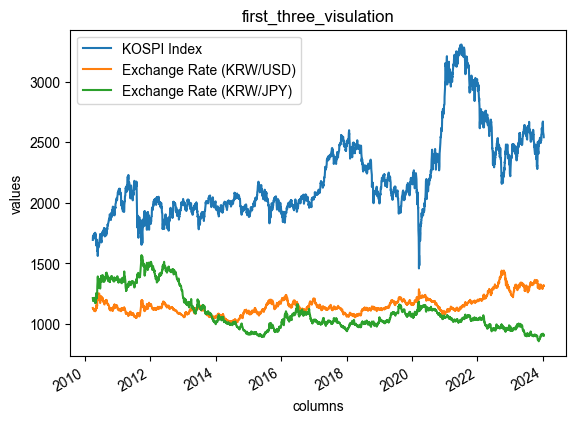

In [227]:
# 클래스와 데이터 개수 분리
# 데이터 프레임을 전치하여 처음 5개의 열에 대한 시각화
X.iloc[:,:3].plot(kind='line', stacked=False)
plt.title('first_three_visulation')
plt.xlabel('columns')
plt.ylabel('values')
plt.show()

In [228]:
# 각 분류기 생성
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()
neural_network = MLPClassifier()

# Voting Classifier 생성
voting_classifier = VotingClassifier(
    estimators=[('lr', logistic_regression), ('rf', random_forest), ('gb', gradient_boosting), ('svm', svm), ('nn', neural_network)],
    voting='hard'
)

# 모델별 정확도 저장
accuracies = {}

models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Support Vector Machine': svm,
    'Neural Network': neural_network,
    'Voting Classifier': voting_classifier
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name}의 정확도: {accuracy}")

# 가장 높은 정확도를 가진 모델 찾기
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"최고의 성능은 {best_model_name} 모델로, 정확도는 {best_accuracy:.3f}입니다.")

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression의 정확도: 0.4165390505359878
Random Forest의 정확도: 0.8330781010719756
Gradient Boosting의 정확도: 0.7733537519142419
Support Vector Machine의 정확도: 0.4104134762633997
Neural Network의 정확도: 0.3215926493108729


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier의 정확도: 0.5727411944869831
최고의 성능은 Random Forest 모델로, 정확도는 0.833입니다.


In [255]:
# 4. 모델 세부 튜닝: 최적 하이퍼파라미터 찾기
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0) 
 
param_dist_rf = { 
 'n_estimators':[50, 100, 500], 
 'max_leaf_nodes':[20, 30, 40, 50], 
 'max_features':[2, 4, 6, 8] 
} 

rnd_search = RandomizedSearchCV(rnd_clf, param_dist_rf, cv=10, random_state=42) 
rnd_search.fit(X_train, y_train) 
print(rnd_search.best_params_)

{'random_state': 80, 'n_estimators': 100, 'max_leaf_nodes': 50, 'max_features': 6, 'max_depth': 14}


In [260]:
# 5. 학습 및 K-fold cross_validation 평가 
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=50, max_features=6, max_depth =14, n_jobs=-1,random_state=80) #디폴트
rnd_scores = cross_val_score(rnd_clf, X_train, y_train, scoring="accuracy", cv=10) 
print("\n<10-fold cross-validation>")
print("accuracy score mean: ", rnd_scores.mean())


<10-fold cross-validation>
accuracy score mean:  0.7740810334703465


In [261]:
# 6. 최종 모델 학습
rnd_clf.fit(X_train, y_train) 
print("\n<AI model: machine learning done >") 
print("accuracy_score of train data(0.8 of sample): ", rnd_clf.score(X_train, y_train))

# <AI model: machine learning done >
# accuracy_score of train data(0.8 of sample):  0.8552833078101072


<AI model: machine learning done >
accuracy_score of train data(0.8 of sample):  0.8526033690658499


In [258]:
# 7. test data 확인
print("accuracy_score of test data(0.2 of sample): ", rnd_clf.score(X_test, y_test)) 
y_test_pred = rnd_clf.predict(X_test) 
print("accuracy_score of test data: ", mt.accuracy_score(y_test, y_test_pred)) 

# accuracy_score of test data(0.2 of sample):  0.7626339969372129
# accuracy_score of test data:  0.7626339969372129

accuracy_score of test data(0.2 of sample):  0.7595712098009189
accuracy_score of test data:  0.7595712098009189


In [259]:
# 8. confusion matrix 확인
y_test_pred = rnd_clf.predict(X_test) 
cm1= confusion_matrix(y_test, y_test_pred, labels=["up","neutral","down"]) 
print("\n<Confusion matrix>") 
print("(of test)") 
print("up","neutral","down") 
print(cm1) 

cm2= confusion_matrix(y_past, rnd_clf.predict(X_past), labels=["up","neutral","down"]) 
print("(of all)") 
print("up","neutral","down") 
print(cm2) 



<Confusion matrix>
(of test)
up neutral down
[[168  39   0]
 [ 37 197  22]
 [  9  50 131]]
(of all)
up neutral down
[[ 885  165    2]
 [ 116 1087   64]
 [  28  167  751]]


In [234]:
# 9. 변수 중요도 체크
print("\n<Feature importance>") 
for name, score in zip(X.columns, rnd_clf.feature_importances_): 
 print(name, ": ", score)


<Feature importance>
KOSPI Index :  0.023106543479799506
Exchange Rate (KRW/USD) :  0.005880122947372203
Exchange Rate (KRW/JPY) :  0.014124640002836935
3-Year Treasury Bond :  0.017427755500267976
10-Year Treasury Bond :  0.006898026204443468
Price-to-Earnings Ratio :  0.0203693077898417
Price-to-Book Ratio :  0.008575416223274351
Volatility Index of KOSPI :  0.006010674459438125
10-Year Treasury Bond Minus 3-Year Treasury Bond :  0.011818893426635361
10-Year Treasury Yield Minus 2-Year Treasury Yield :  0.007263653273790551
USA Consumer Price Index :  0.007611121968783042
USA Employment Inflation :  0.005496493838174537
Yield Gap Percentage :  0.018997608547572736
Consumer Price Index :  0.007384087891918907
Export :  0.013347489215410475
West Texas Intermediate (WTI) Crude Oil Price :  0.013370609874124483
2-Year Treasury Constant Maturity Rate :  0.008178848689895773
10-Year Treasury Constant Maturity Rate :  0.01398671439588965
Treasury Inflation-Protected Securities (TIPS) Yield

In [235]:
# 10. backtesting용 과거의 예측데이터 생성
y_prediction = rnd_clf.predict(X) 
y_pred = pd.Series(y_prediction, index=y.index) 


In [236]:
# 11. 모델 저장
joblib.dump(rnd_clf, "auto_model.pkl")
print("\n< AI model: save >")


< AI model: save >
